# IMPORTS AND FUNCTIONS

In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import seaborn as sns
import pandas as pd



c:\Users\larar\anaconda3\envs\deeplearning2024\Lib\site-packages\onnxruntime\capi\onnxruntime_validation.py:26: UserWarning: Unsupported Windows version (11). ONNX Runtime supports Windows 10 and above, only.
  warnings.warn(


In [2]:
from functions_preprocessing import combine_image_folders, erase_double_images, train_test

import functions_validation as v

import functions_licenseplate as fl

import functions_recognition as r

import SVC as svc

import CNN as cnn

import API_car_model as api

# PREPROCESSING DATA

In [17]:

"""source_folders = [
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS MERI",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS LARA",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Frontal",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Lateral"
]

destination_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'
combine_image_folders(source_folders, destination_folder) #ALREADY CREATED"""


Folder created: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES


In [18]:

"""folder_path = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'
erase_double_images(folder_path)"""

Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\8970GZR (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\7122FYJ (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\2748LKK (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\0085LND (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\1139LJX (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\2375KFD (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\4634JKH (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\4346HMW (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\8033MLP (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\4812GTX (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\3214LCL (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\7911LYX (1).jpg
Deleted: G:/Mi u

In [19]:
"""source_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'  
train_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'    
test_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset'     
val_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset'
# Call the train_test function to perform the split
train_test(source_folder, train_folder, test_folder, val_folder)"""


Data split complete: 144 training files, 72 testing files, 24 validation files.


# DETECTION LICENSE PLATE

## CROPPING USING YOLO

In [7]:
"""image_folder_2 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'
cropped_plates_train_2 = fl.boundingbox(image_folder_2)#dictionary name plate (sequence) + croppedd image
image_folder_3 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset'
cropped_plates_train_3 = fl.boundingbox(image_folder_3)#dictionary name plate (sequence) + croppedd image
image_folder_4 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset'
cropped_plates_train_4 = fl.boundingbox(image_folder_4)#dictionary name plate (sequence) + croppedd image"""

In [8]:
"""save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train_2, save_folder)
save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train_3, save_folder)
save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train_4, save_folder)"""

Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\1310MPK.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\6040DLX.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\2953JHW.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\8384KWN.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\5240KSW.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\6712KPR.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\6554BNX.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\1339MMS.jpg
Saved cropped plate to G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages\9542KDC.jpg
Saved cropped plate to G:/Mi

# TRAINING MODELS (character detection)

## SVC MODEL 

In [3]:
base_path_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters'
accuracy, clf, scaler, label_encoder = svc.train_svm_and_get_accuracy(base_path_lara)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 87.21%


## CNN MODEL

In [4]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  
    transforms.Resize((28, 28)),                 
    transforms.ToTensor(),                        
    transforms.Normalize((0.5,), (0.5,))         
])

dataset = ImageFolder(root= base_path_lara, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#print(f"Classes: {dataset.classes}")

num_classes = len(dataset.classes)
model = cnn.CNNModel(num_classes)

criterion = cnn.nn.CrossEntropyLoss() 
optimizer = cnn.optim.Adam(model.parameters(), lr=0.001)

model.to(cnn.device)

cnn.train_model(model, train_loader, criterion, optimizer, num_epochs=30)
cnn.evaluate_model(model,test_loader)

Epoch [1/30], Loss: 3.567791700363159
Epoch [2/30], Loss: 3.2217656915838067
Epoch [3/30], Loss: 2.6013115644454956
Epoch [4/30], Loss: 1.6976417628201572
Epoch [5/30], Loss: 1.1486668315800754
Epoch [6/30], Loss: 0.7370937331156298
Epoch [7/30], Loss: 0.5076939571987499
Epoch [8/30], Loss: 0.29496600140224805
Epoch [9/30], Loss: 0.22657926617698235
Epoch [10/30], Loss: 0.1764775270765478
Epoch [11/30], Loss: 0.13025157864798198
Epoch [12/30], Loss: 0.10455228930169885
Epoch [13/30], Loss: 0.1041620077395981
Epoch [14/30], Loss: 0.11042351817542856
Epoch [15/30], Loss: 0.08562502171844244
Epoch [16/30], Loss: 0.051723278550939125
Epoch [17/30], Loss: 0.03149224948984655
Epoch [18/30], Loss: 0.03510911119255153
Epoch [19/30], Loss: 0.041666312122040174
Epoch [20/30], Loss: 0.04507654456591064
Epoch [21/30], Loss: 0.033383555128239095
Epoch [22/30], Loss: 0.04960223691622642
Epoch [23/30], Loss: 0.0366290811533955
Epoch [24/30], Loss: 0.040401718663898384
Epoch [25/30], Loss: 0.040380313

# RESULTS (own data)

## TRAINING RESULTS

In [ ]:
"""pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'
# Define directories for saving Spanish and non-Spanish results
spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Spain (TRAIN)"
non_spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Rest (TRAIN)"

predict_train_svc = []
predict_train_svc_filter = []
predict_train_cnn = []
predict_train_cnn_filter = []
predict_train_ocr = []
predict_train_ocr_filter = []
c = 0

# Create directories if they don't exist
os.makedirs(spanish_dir, exist_ok=True)
os.makedirs(non_spanish_dir, exist_ok=True)

# Loop over the image files
for image_file in os.listdir(pc_lara):
        if image_file.endswith('.jpg'):  # Ensure we're processing image files only
            image_path = os.path.join(pc_lara, image_file)
            image = cv2.imread(image_path)
            car = image.copy()
            if os.path.exists(spanish_dir):
                c+=1
                print(f"Result image for {image_file} already exists. Skipping...")
                continue  # Skip to the next image if the result already exists

            # SEGMENTATION CHARACTERS------------------------------------------
            # METHOD 1
            m1_chars = r.segment_characters(image)
            r.visualize_char(m1_chars)

            # METHOD 2
            upscaled_license_plate, m2_chars = r.OCR_image(
                license_plate=image, t=180, min_h=80, min_w=20, min_ar=0.2, max_ar=1.4, area=6000)

            # Choose the best method
            best_char = r.best_segmentation_method(m1_chars, m2_chars)

            #SAVE CHARACTERS IF WELL-SEGMENTED TO INCREASE THE DATASET (only trainset images)
            #for i in range(len(characters)):
            #save the files to expand the dataset
            #output_path = os.path.join("G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters", f'caracter_{i}.png')
            #cv2.imwrite(output_path, characters[i])
            
            # PREDICTION MODELS------------------------------------------
            plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, best_char, label_encoder)
            predict_train_svc.append(plate_sol)
            label_encoder = LabelEncoder()
            label_encoder.fit(dataset.classes)  
            predicted_plate = cnn.predict_characters(model, best_char, label_encoder)
            predict_train_cnn.append(predicted_plate)
            license_plate_text = r.easy_ocr_method(upscaled_license_plate)
            predict_train_ocr.append(license_plate_text)

            fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
            
            filter_plate_svc = r.filter_spain_plates(plate_sol)
            predict_train_svc_filter.append(filter_plate_svc)
            filter_plate_cnn = r.filter_spain_plates(predicted_plate)
            predict_train_cnn_filter.append(filter_plate_cnn)
            filter_plate_ocr = r.filter_spain_plates(license_plate_text)
            predict_train_ocr_filter.append(filter_plate_ocr)

            axes[0].set_title(f"SVM Prediction: {plate_sol}\nFiltered: {filter_plate_svc}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}\nFiltered: {filter_plate_cnn}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}\nFiltered: {filter_plate_ocr}")

            save_dir = spanish_dir 

            axes[0].imshow(car, cmap='gray')
            axes[0].axis('off')

            axes[1].imshow(car, cmap='gray')
            axes[1].axis('off')

            axes[2].imshow(car, cmap='gray')
            axes[2].axis('off')

            plt.tight_layout()

            # Save the image with a relevant name in the correct folder
            result_image_path = os.path.join(save_dir, f'{os.path.splitext(image_file)[0]}.png')
            plt.savefig(result_image_path)
            plt.close()"""

## TEST RESULTS

In [ ]:
"""pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset_croppedimages'
spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Spain (TEST)"
non_spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Rest (TEST)"

predict_test_svc = []
predict_test_svc_filter = []
predict_test_cnn = []
predict_test_cnn_filter = []
predict_test_ocr = []
predict_test_ocr_filter = []

# Create directories if they don't exist
os.makedirs(spanish_dir, exist_ok=True)
os.makedirs(non_spanish_dir, exist_ok=True)

# Loop over the image files
for image_file in os.listdir(pc_lara):
    if image_file.endswith('.jpg'):  # Ensure we're processing image files only
        image_path = os.path.join(pc_lara, image_file)
        image = cv2.imread(image_path)
        car = image.copy()

        # SEGMENTATION CHARACTERS------------------------------------------
        # METHOD 1
        m1_chars = r.segment_characters(image)
        r.visualize_char(m1_chars)

        # METHOD 2
        upscaled_license_plate, m2_chars = r.OCR_image(
            license_plate=image, t=180, min_h=80, min_w=20, min_ar=0.2, max_ar=1.4, area=6000)

        # Choose the best method
        best_char = r.best_segmentation_method(m1_chars, m2_chars)

        # PREDICTION MODELS------------------------------------------
        plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, best_char, label_encoder)
        predict_test_svc.append(plate_sol)
        label_encoder = LabelEncoder()
        label_encoder.fit(dataset.classes)  
        predicted_plate = cnn.predict_characters(model, best_char, label_encoder)
        predict_test_cnn.append(predicted_plate)
        license_plate_text = r.easy_ocr_method(upscaled_license_plate)
        predict_test_ocr.append(license_plate_text)

        # Ask if the plate is Spanish
        spain = input("Is it a Spanish plate?: ")

        # Create the figure and axes for plotting
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
        
        if spain.upper() == "Y":
            # Filter for Spanish plates
            filter_plate_svc = r.filter_spain_plates(plate_sol)
            predict_test_svc_filter.append(filter_plate_svc)
            filter_plate_cnn = r.filter_spain_plates(predicted_plate)
            predict_test_cnn_filter.append(filter_plate_cnn)
            filter_plate_ocr = r.filter_spain_plates(license_plate_text)
            predict_test_ocr_filter.append(filter_plate_ocr)

            # Update titles to include filtered predictions
            axes[0].set_title(f"SVM Prediction: {plate_sol}\nFiltered: {filter_plate_svc}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}\nFiltered: {filter_plate_cnn}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}\nFiltered: {filter_plate_ocr}")

            save_dir = spanish_dir  # Save results in the Spanish folder

        else:
            # No filtering for non-Spanish plates
            axes[0].set_title(f"SVM Prediction: {plate_sol}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}")

            save_dir = non_spanish_dir  # Save results in the non-Spanish folder

        # Plot the car image with the respective titles
        axes[0].imshow(car, cmap='gray')
        axes[0].axis('off')

        axes[1].imshow(car, cmap='gray')
        axes[1].axis('off')

        axes[2].imshow(car, cmap='gray')
        axes[2].axis('off')

        plt.tight_layout()

        # Save the image with a relevant name in the correct folder
        result_image_path = os.path.join(save_dir, f'{os.path.splitext(image_file)[0]}.png')
        plt.savefig(result_image_path)
        plt.close()
"""

## VALIDATION RESULTS

In [ ]:
"""pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset_croppedimages'
spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Spain (VALIDATION)"
non_spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Rest (VALIDATION)"

predict_validation_svc = []
predict_validation_svc_filter = []
predict_validation_cnn = []
predict_validation_cnn_filter = []
predict_validation_ocr = []
predict_validation_ocr_filter = []

# Create directories if they don't exist
os.makedirs(spanish_dir, exist_ok=True)
os.makedirs(non_spanish_dir, exist_ok=True)

# Loop over the image files
for image_file in os.listdir(pc_lara):
    if image_file.endswith('.jpg'):  # Ensure we're processing image files only
        image_path = os.path.join(pc_lara, image_file)
        image = cv2.imread(image_path)
        car = image.copy()

        # SEGMENTATION CHARACTERS------------------------------------------
        # METHOD 1
        m1_chars = r.segment_characters(image)
        r.visualize_char(m1_chars)

        # METHOD 2
        upscaled_license_plate, m2_chars = r.OCR_image(
            license_plate=image, t=180, min_h=80, min_w=20, min_ar=0.2, max_ar=1.4, area=6000)

        # Choose the best method
        best_char = r.best_segmentation_method(m1_chars, m2_chars)

        # PREDICTION MODELS------------------------------------------
        plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, best_char, label_encoder)
        predict_validation_svc.append(plate_sol)
        label_encoder = LabelEncoder()
        label_encoder.fit(dataset.classes)  
        predicted_plate = cnn.predict_characters(model, best_char, label_encoder)
        predict_validation_cnn.append(predicted_plate)
        license_plate_text = r.easy_ocr_method(upscaled_license_plate)
        predict_validation_ocr.append(license_plate_text)

        # Ask if the plate is Spanish
        spain = input("Is it a Spanish plate?: ")

        # Create the figure and axes for plotting
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
        
        if spain.upper() == "Y":
            # Filter for Spanish plates
            filter_plate_svc = r.filter_spain_plates(plate_sol)
            predict_validation_svc_filter.append(filter_plate_svc)
            filter_plate_cnn = r.filter_spain_plates(predicted_plate)
            predict_validation_cnn_filter.append(filter_plate_cnn)
            filter_plate_ocr = r.filter_spain_plates(license_plate_text)
            predict_validation_ocr_filter.append(filter_plate_ocr)

            # Update titles to include filtered predictions
            axes[0].set_title(f"SVM Prediction: {plate_sol}\nFiltered: {filter_plate_svc}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}\nFiltered: {filter_plate_cnn}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}\nFiltered: {filter_plate_ocr}")

            save_dir = spanish_dir  # Save results in the Spanish folder

        else:
            # No filtering for non-Spanish plates
            axes[0].set_title(f"SVM Prediction: {plate_sol}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}")

            save_dir = non_spanish_dir  # Save results in the non-Spanish folder

        # Plot the car image with the respective titles
        axes[0].imshow(car, cmap='gray')
        axes[0].axis('off')

        axes[1].imshow(car, cmap='gray')
        axes[1].axis('off')

        axes[2].imshow(car, cmap='gray')
        axes[2].axis('off')

        plt.tight_layout()

        # Save the image with a relevant name in the correct folder
        result_image_path = os.path.join(save_dir, f'{os.path.splitext(image_file)[0]}.png')
        plt.savefig(result_image_path)
        plt.close()
"""

#### SAVE LIST OF OUTPUTS

In [13]:
"""# Function to save lists to txt file
def save_list_to_txt(list_data, file_path):
    with open(file_path, 'w') as f:
        for item in list_data:
            f.write(f"{item}\n")  

svc_predictions_path_validation = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_predictions_validation.txt"
cnn_predictions_path_validation = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_predictions_validation.txt"
ocr_predictions_path_validation = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_predictions_validation.txt"

svc_filtered_path_validation = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_filtered_validation.txt"
cnn_filtered_path_validation = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_filtered_validation.txt"
ocr_filtered_path_validation = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_filtered_validation.txt"

save_list_to_txt(predict_validation_svc, svc_predictions_path_validation)
save_list_to_txt(predict_validation_cnn, cnn_predictions_path_validation)
save_list_to_txt(predict_validation_ocr, ocr_predictions_path_validation)

# Guardar predicciones filtradas para placas españolas
save_list_to_txt(predict_validation_svc_filter, svc_filtered_path_validation)
save_list_to_txt(predict_validation_cnn_filter, cnn_filtered_path_validation)
save_list_to_txt(predict_validation_ocr_filter, ocr_filtered_path_validation)"""

# EVALUATING MODELS

## Training

#### Add recall, precision, f1-score (falta) + plots

SVM:
Total Characters Matched: 246
Total Unmatched Characters: 246


CNN:
Total Characters Matched: 275
Total Unmatched Characters: 225


OCR:
Total Characters Matched: 121
Total Unmatched Characters: 708


SVM_FILTER:
Total Characters Matched: 291
Total Unmatched Characters: 140


CNN_FILTER:
Total Characters Matched: 342
Total Unmatched Characters: 119


OCR_FILTER:
Total Characters Matched: 256
Total Unmatched Characters: 448


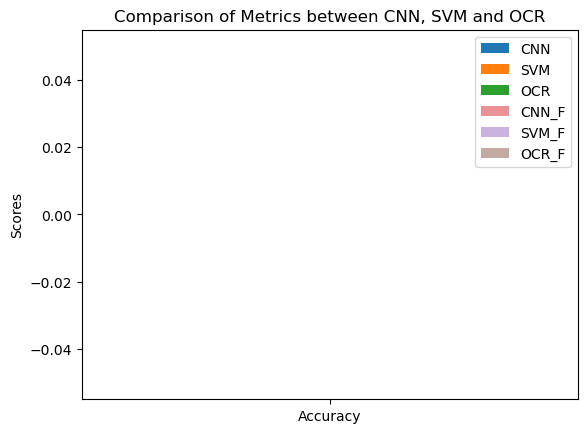

In [27]:
image_dir = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'  
svm_txt = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_predictions.txt'  
cnn_txt = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_predictions.txt' 
ocr_txt = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_predictions.txt'  
svm_txt_filter = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_filtered.txt'  
cnn_txt_filter = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_filtered.txt'  
ocr_txt_filter = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_filtered.txt'  

v.run_evaluation_with_filenames(image_dir, svm_txt, cnn_txt, ocr_txt, svm_txt_filter, cnn_txt_filter, ocr_txt_filter)

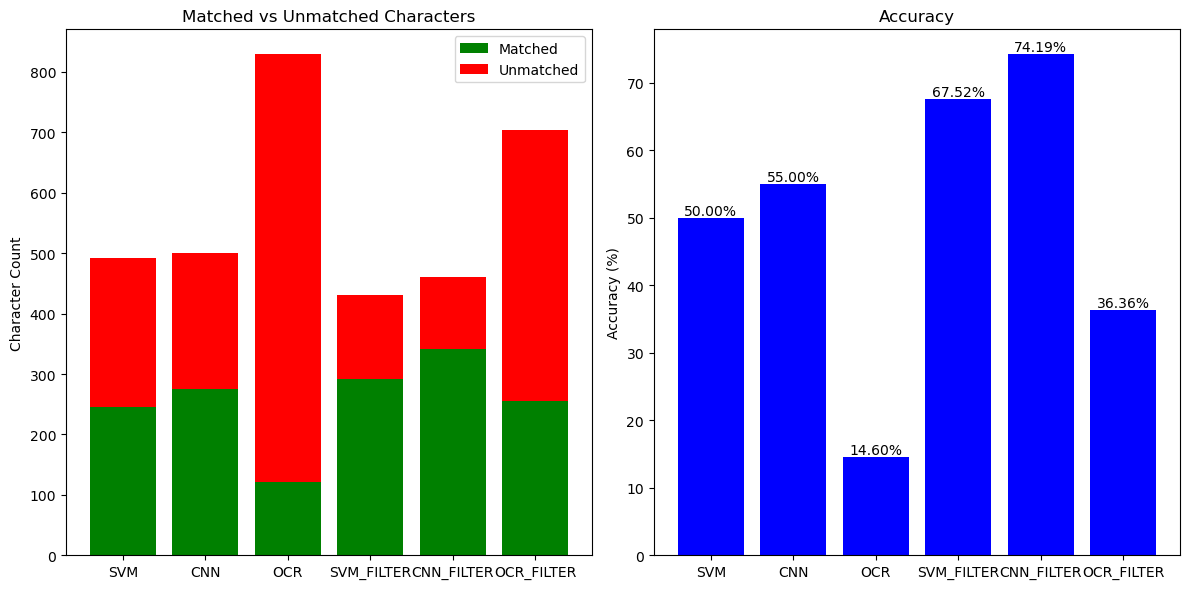

In [36]:
data = {
    "SVM": {"matched": 246, "unmatched": 246},
    "CNN": {"matched": 275, "unmatched": 225},
    "OCR": {"matched": 121, "unmatched": 708},
    "SVM_FILTER": {"matched": 291, "unmatched": 140},
    "CNN_FILTER": {"matched": 342, "unmatched": 119},
    "OCR_FILTER": {"matched": 256, "unmatched": 448},
}

for filter_name, counts in data.items():
    total = counts["matched"] + counts["unmatched"]
    accuracy = (counts["matched"] / total) * 100
    data[filter_name]["accuracy"] = accuracy

filters = list(data.keys())
matched = [data[filter]["matched"] for filter in filters]
unmatched = [data[filter]["unmatched"] for filter in filters]
accuracy = [data[filter]["accuracy"] for filter in filters]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(filters, matched, color='g', label='Matched')
ax[0].bar(filters, unmatched, bottom=matched, color='r', label='Unmatched')
ax[0].set_ylabel('Character Count')
ax[0].set_title('Matched vs Unmatched Characters')
ax[0].legend()

bars = ax[1].bar(filters, accuracy, color='b')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title('Accuracy')

for bar in bars:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Testing

SVM:
Total Characters Matched: 137
Total Unmatched Characters: 94


CNN:
Total Characters Matched: 135
Total Unmatched Characters: 94


OCR:
Total Characters Matched: 68
Total Unmatched Characters: 378


SVM_FILTER:
Total Characters Matched: 143
Total Unmatched Characters: 56


CNN_FILTER:
Total Characters Matched: 142
Total Unmatched Characters: 63


OCR_FILTER:
Total Characters Matched: 143
Total Unmatched Characters: 196


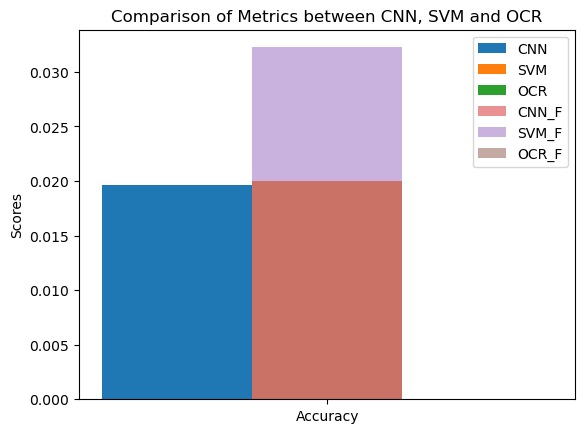

In [29]:
image_dir_test = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset_croppedimages'  
svm_txt_test = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_predictions_test.txt'  
cnn_txt_test = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_predictions_test.txt' 
ocr_txt_test = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_predictions_test.txt'  
svm_txt_filter_test = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_filtered_test.txt'  
cnn_txt_filter_test = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_filtered_test.txt'  
ocr_txt_filter_test = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_filtered_test.txt'  

v.run_evaluation_with_filenames(image_dir_test, svm_txt_test, cnn_txt_test, ocr_txt_test, svm_txt_filter_test, cnn_txt_filter_test, ocr_txt_filter_test)

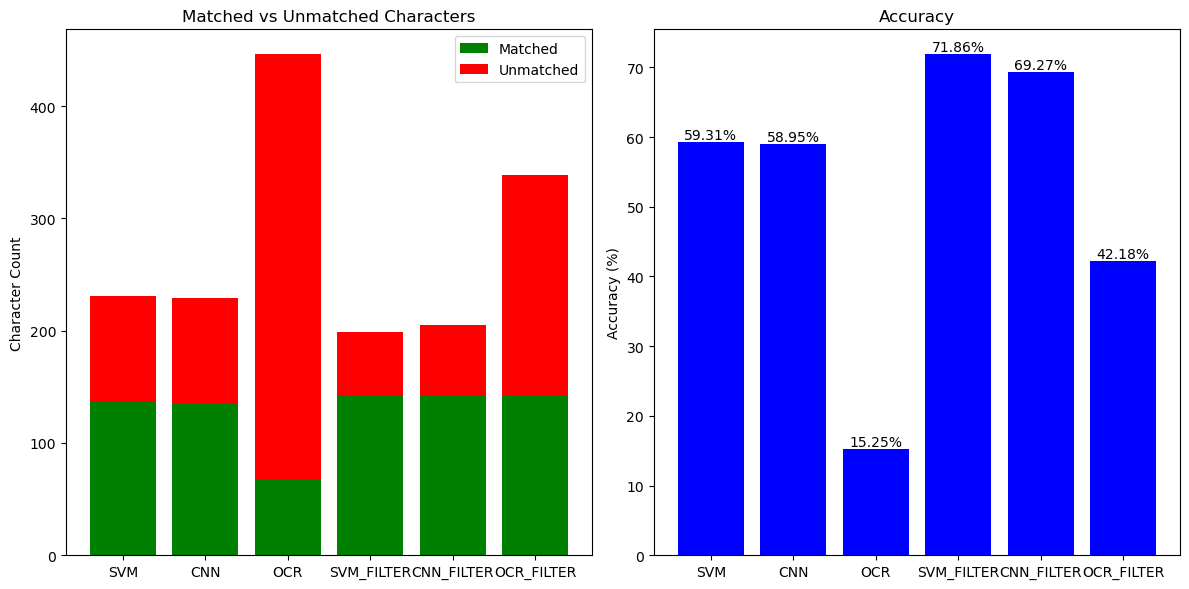

In [35]:
data2 = {
    "SVM": {"matched": 137, "unmatched": 94},
    "CNN": {"matched": 135, "unmatched": 94},
    "OCR": {"matched": 68, "unmatched": 378},
    "SVM_FILTER": {"matched": 143, "unmatched": 56},
    "CNN_FILTER": {"matched": 142, "unmatched": 63},
    "OCR_FILTER": {"matched": 143, "unmatched": 196},
}


for filter_name, counts in data2.items():
    total = counts["matched"] + counts["unmatched"]
    accuracy = (counts["matched"] / total) * 100
    data2[filter_name]["accuracy"] = accuracy


filters = list(data2.keys())
matched = [data2[filter]["matched"] for filter in filters]
unmatched = [data2[filter]["unmatched"] for filter in filters]
accuracy = [data2[filter]["accuracy"] for filter in filters]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(filters, matched, color='g', label='Matched')
ax[0].bar(filters, unmatched, bottom=matched, color='r', label='Unmatched')
ax[0].set_ylabel('Character Count')
ax[0].set_title('Matched vs Unmatched Characters')
ax[0].legend()


bars = ax[1].bar(filters, accuracy, color='b')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title('Accuracy')

for bar in bars:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Validation

SVM:
Total Characters Matched: 42
Total Unmatched Characters: 35


CNN:
Total Characters Matched: 42
Total Unmatched Characters: 49


OCR:
Total Characters Matched: 40
Total Unmatched Characters: 91


SVM_FILTER:
Total Characters Matched: 42
Total Unmatched Characters: 35


CNN_FILTER:
Total Characters Matched: 56
Total Unmatched Characters: 28


OCR_FILTER:
Total Characters Matched: 42
Total Unmatched Characters: 77


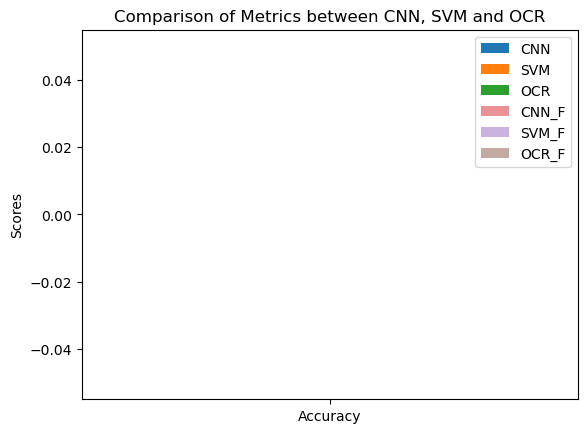

In [31]:
image_dir_validation = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset_croppedimages'  
svm_txt_validation = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_predictions_validation.txt'  
cnn_txt_validation = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_predictions_validation.txt' 
ocr_txt_validation = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_predictions_validation.txt'  
svm_txt_filter_validation = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/svc_filtered_validation.txt'  
cnn_txt_filter_validation = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/cnn_filtered_validation.txt'  
ocr_txt_filter_validation = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/ocr_filtered_validation.txt'  

v.run_evaluation_with_filenames(image_dir_validation, svm_txt_validation, cnn_txt_validation, ocr_txt_validation, svm_txt_validation, cnn_txt_filter_validation, ocr_txt_filter_validation)

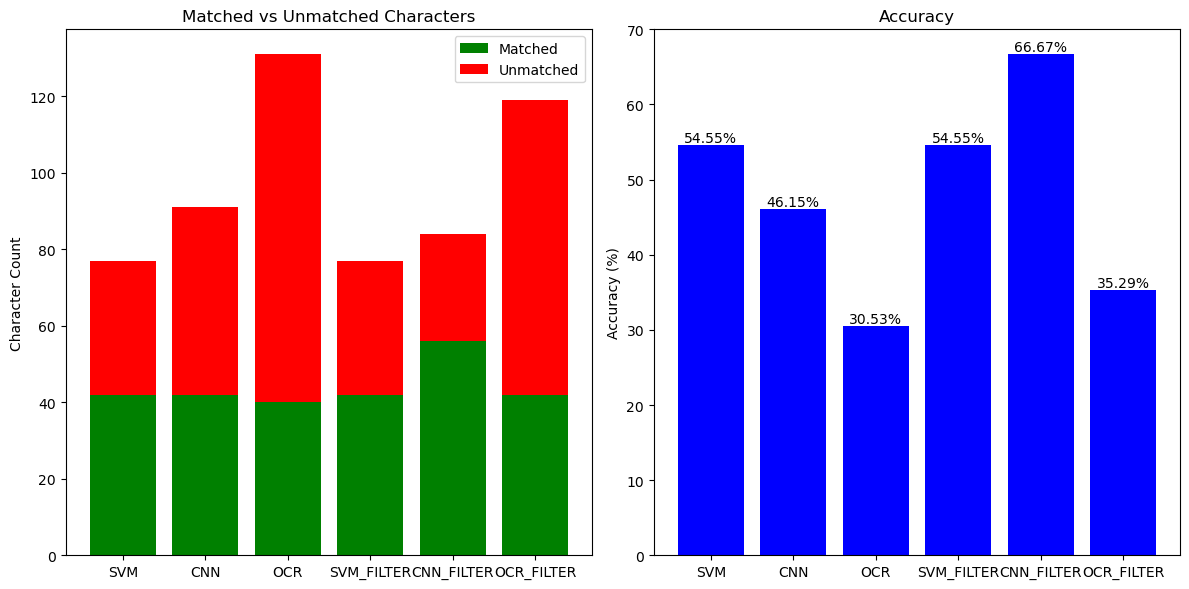

In [34]:
data3 = {
    "SVM": {"matched": 42, "unmatched": 35},
    "CNN": {"matched": 42, "unmatched": 49},
    "OCR": {"matched": 40, "unmatched": 91},
    "SVM_FILTER": {"matched": 42, "unmatched": 35},
    "CNN_FILTER": {"matched": 56, "unmatched": 28},
    "OCR_FILTER": {"matched": 42, "unmatched": 77},
}

for filter_name, counts in data3.items():
    total = counts["matched"] + counts["unmatched"]
    accuracy = (counts["matched"] / total) * 100
    data3[filter_name]["accuracy"] = accuracy

filters = list(data3.keys())
matched = [data3[filter]["matched"] for filter in filters]
unmatched = [data3[filter]["unmatched"] for filter in filters]
accuracy = [data3[filter]["accuracy"] for filter in filters]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].bar(filters, matched, color='g', label='Matched')
ax[0].bar(filters, unmatched, bottom=matched, color='r', label='Unmatched')
ax[0].set_ylabel('Character Count')
ax[0].set_title('Matched vs Unmatched Characters')
ax[0].legend()


bars = ax[1].bar(filters, accuracy, color='b')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title('Accuracy')

for bar in bars:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')


plt.tight_layout()
plt.show()


## comparison

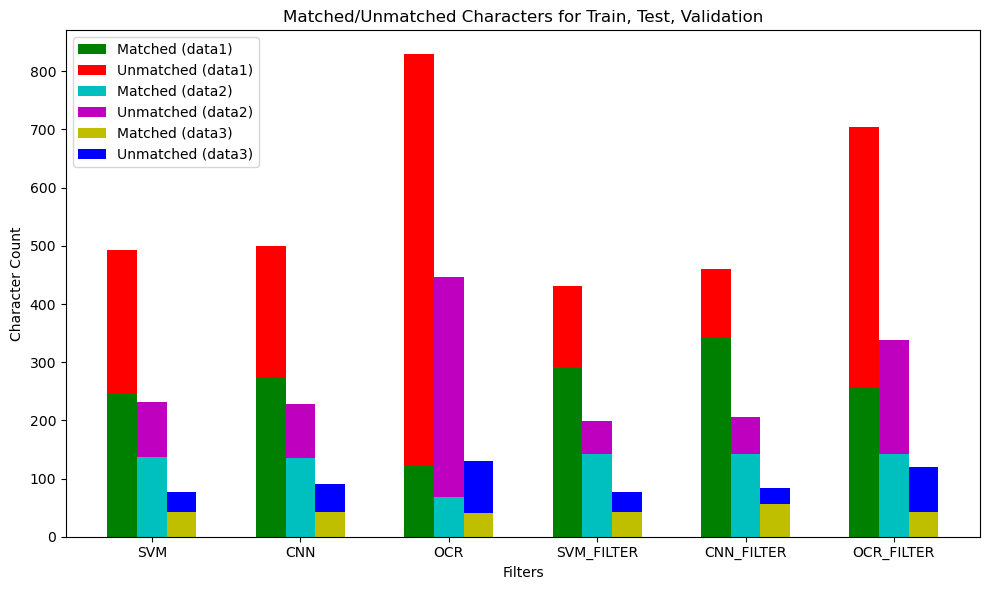

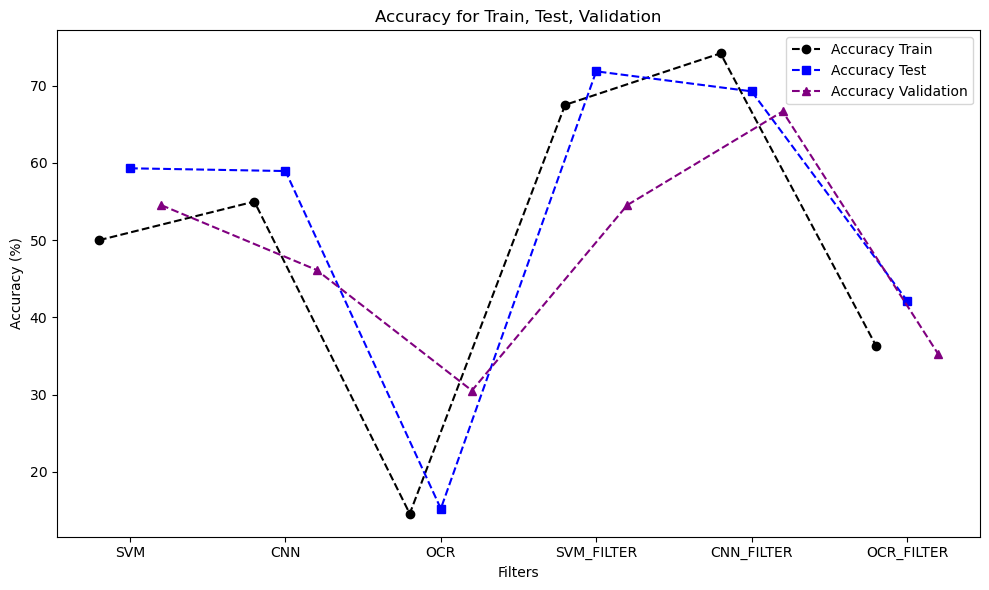

In [24]:
# Function to calculate accuracy
def calculate_accuracy(data):
    accuracies = {}
    for key, values in data.items():
        total = values["matched"] + values["unmatched"]
        accuracies[key] = (values["matched"] / total) * 100
    return accuracies

# Calculating accuracies
accuracy1 = calculate_accuracy(data)
accuracy2 = calculate_accuracy(data2)
accuracy3 = calculate_accuracy(data3)

# Plotting all three datasets together
filters = list(data.keys())
matched1 = [data[filter]["matched"] for filter in filters]
unmatched1 = [data[filter]["unmatched"] for filter in filters]
accuracy1 = [accuracy1[filter] for filter in filters]

matched2 = [data2[filter]["matched"] for filter in filters]
unmatched2 = [data2[filter]["unmatched"] for filter in filters]
accuracy2 = [accuracy2[filter] for filter in filters]

matched3 = [data3[filter]["matched"] for filter in filters]
unmatched3 = [data3[filter]["unmatched"] for filter in filters]
accuracy3 = [accuracy3[filter] for filter in filters]

bar_width = 0.2  # Width of bars
index = range(len(filters))  # X positions for bars


# Plot 1: Matched and Unmatched Characters (stacked bars)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot matched/unmatched characters for data1, data2, data3
ax1.bar([i - bar_width for i in index], matched1, bar_width, color='g', label='Matched (data1)')
ax1.bar([i - bar_width for i in index], unmatched1, bar_width, color='r', bottom=matched1, label='Unmatched (data1)')

ax1.bar(index, matched2, bar_width, color='c', label='Matched (data2)')
ax1.bar(index, unmatched2, bar_width, color='m', bottom=matched2, label='Unmatched (data2)')

ax1.bar([i + bar_width for i in index], matched3, bar_width, color='y', label='Matched (data3)')
ax1.bar([i + bar_width for i in index], unmatched3, bar_width, color='b', bottom=matched3, label='Unmatched (data3)')

ax1.set_xlabel('Filters')
ax1.set_ylabel('Character Count')
ax1.set_title('Matched/Unmatched Characters for Train, Test, Validation')
ax1.set_xticks(index)
ax1.set_xticklabels(filters)
ax1.legend(loc='upper left')

# Show plot 1
plt.tight_layout()
plt.show()

# Plot 2: Accuracy Plot
fig, ax2 = plt.subplots(figsize=(10, 6))

# Plot the accuracy for data1, data2, data3
ax2.plot([i - bar_width for i in index], accuracy1, color='black', marker='o', linestyle='--', label='Accuracy Train')
ax2.plot(index, accuracy2, color='blue', marker='s', linestyle='--', label='Accuracy Test')
ax2.plot([i + bar_width for i in index], accuracy3, color='purple', marker='^', linestyle='--', label='Accuracy Validation')

ax2.set_xlabel('Filters')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Accuracy for Train, Test, Validation')
ax2.set_xticks(index)
ax2.set_xticklabels(filters)
ax2.legend(loc='upper right')


# Show plot 2
plt.tight_layout()
plt.show()


# API PART

In [34]:
#api.api_car_model(predicted_plate)

STATE: 200
RESPONSE: <?xml version="1.0" encoding="utf-8"?><soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema"><soap:Body><CheckSpainResponse xmlns="http://regcheck.org.uk"><CheckSpainResult><vehicleJson>{
  "Description": "CITROEN C3",
  "CarMake": {
    "CurrentTextValue": "CITROEN"
  },
  "CarModel": {
    "CurrentTextValue": "C3"
  },
  "MakeDescription": {
    "CurrentTextValue": "CITROEN"
  },
  "ModelDescription": {
    "CurrentTextValue": "C3"
  },
  "EngineSize": "1199",
  "VehicleIdentificationNumber": null,
  "RegistrationYear": "2023",
  "RegistrationDate": "15/06/2023",
  "Variation": "1.2 PURETECH 83 FEEL",
  "Seats": null,
  "VariantType": "Gasolina 1199 cc 5 puertas",
  "VehicleType": "Car",
  "Fuel": "Gasolina",
  "IndicativePrice": null,
  "Doors": "5",
  "AllTerain": null,
  "KType": null,
  "ImageUrl": "http://matriculaapi.com/image.aspx/@Q0lUUk9FTiBD

# COUNTER CHARACTERS

In [6]:
path = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters"
output_file = "folder_counts.csv"
r.count_files_in_folders(path, output_file)

Data has been saved to folder_counts.csv
